# Water Survey of Canada HYDAT
Historical data for lake levels and stream flows in the Canadian portion of the Rainy River watershed are publically available from the [HYDAT database](https://www.canada.ca/en/environment-climate-change/services/water-overview/quantity/monitoring/survey/data-products-services/national-archive-hydat.html) maintained by the [Water Survey of Canada (WSC)](https://www.canada.ca/en/environment-climate-change/services/water-overview/quantity/monitoring/survey.html). The HYDAT database consists of a downloadable Microsoft Access .mdb or sqlite3 files providing data from hydrological measuring stations located throughout Canada.

This notebook provides Python code to read the sqlite3 version of a downloaded copy of the HYDAT database. 


## Accessing HYDAT via sqlite3

In [1]:
import pandas as pd
import importlib
import sys
sys.path.insert(0, '../../python')

import hydat
importlib.reload(hydat)

hydat = hydat.Hydat('../../data/Hydat.sqlite3')
hydat.info()

[('STATIONS',),
 ('CONCENTRATION_SYMBOLS',),
 ('SED_SAMPLES_PSD',),
 ('ANNUAL_INSTANT_PEAKS',),
 ('STN_DATUM_UNRELATED',),
 ('DATA_SYMBOLS',),
 ('SED_VERTICAL_LOCATION',),
 ('STN_DATA_COLLECTION',),
 ('PEAK_CODES',),
 ('SED_DATA_TYPES',),
 ('MEASUREMENT_CODES',),
 ('SED_VERTICAL_SYMBOLS',),
 ('DATA_TYPES',),
 ('DLY_FLOWS',),
 ('STN_REMARKS',),
 ('STN_DATUM_CONVERSION',),
 ('AGENCY_LIST',),
 ('SED_DLY_SUSCON',),
 ('STN_OPERATION_SCHEDULE',),
 ('STN_DATA_RANGE',),
 ('PRECISION_CODES',),
 ('SED_DLY_LOADS',),
 ('DLY_LEVELS',),
 ('OPERATION_CODES',),
 ('STN_REGULATION',),
 ('DATUM_LIST',),
 ('ANNUAL_STATISTICS',),
 ('VERSION',),
 ('REGIONAL_OFFICE_LIST',),
 ('SAMPLE_REMARK_CODES',),
 ('STN_REMARK_CODES',),
 ('SED_SAMPLES',),
 ('STN_STATUS_CODES',)]

In [2]:
rr = hydat.get_flows('05PC019', 1900, 2022)


1905-10-25    399.0
1905-10-26    405.0
1905-10-27    396.0
1905-10-28    394.0
1905-10-29    391.0
dtype: float64

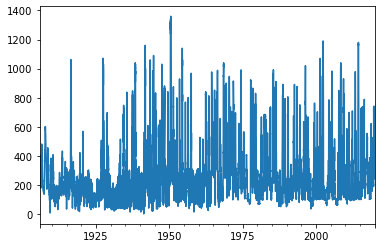

In [3]:
rr.plot()
rr.head()

## Station Data

In [4]:
# bounding region
lat = (47.5, 49.0)
lng = (-94.0, -90.5)

stations = hydat.get_stations(lat, lng)

print(f"Stations in the HYDAT database = {len(stations.index)}")
print(stations.columns)
display(stations.loc[:, ["STATION_NUMBER", "STATION_NAME", "LATITUDE", "LONGITUDE", "HYD_STATUS"]])

Stations in the HYDAT database = 34
Index(['STATION_NUMBER', 'STATION_NAME', 'PROV_TERR_STATE_LOC',
       'REGIONAL_OFFICE_ID', 'HYD_STATUS', 'SED_STATUS', 'LATITUDE',
       'LONGITUDE', 'DRAINAGE_AREA_GROSS', 'DRAINAGE_AREA_EFFECT', 'RHBN',
       'REAL_TIME', 'CONTRIBUTOR_ID', 'OPERATOR_ID', 'DATUM_ID'],
      dtype='object')


,STATION_NUMBER,STATION_NAME,LATITUDE,LONGITUDE,HYD_STATUS
0,05PA001,KETTLE RIVER ABOVE KETTLE FALLS,48.494438,-92.644440,D
1,05PA003,NAMAKAN LAKE ABOVE KETTLE FALLS DAM,48.500000,-92.638863,D
2,05PA005,NORTHERN LIGHT LAKE AT OUTLET,48.240280,-90.768890,D
3,05PA006,NAMAKAN RIVER AT OUTLET OF LAC LA CROIX,48.382561,-92.176308,A
4,05PA007,CROOKED LAKE NEAR CURTAIN FALLS,48.237499,-91.906113,D
5,05PA010,FRENCH LAKE NEAR ATIKOKAN,48.672218,-91.135002,D
6,05PA011,LAC LA CROIX AT CAMPBELL'S CAMP,48.355080,-92.217438,D
7,05PA012,BASSWOOD RIVER NEAR WINTON,48.082561,-91.651169,A
8,05PA013,NAMAKAN LAKE AT SQUIRREL ISLAND,48.496861,-92.658562,A
9,05PB001,SEINE RIVER NEAR LA SEINE,48.750000,-92.199997,D


<AxesSubplot:title={'center':'INTERNATIONAL FALLS INTERNATIONAL AIRPORT, MN US'}, xlabel='DATE', ylabel='Inches'>

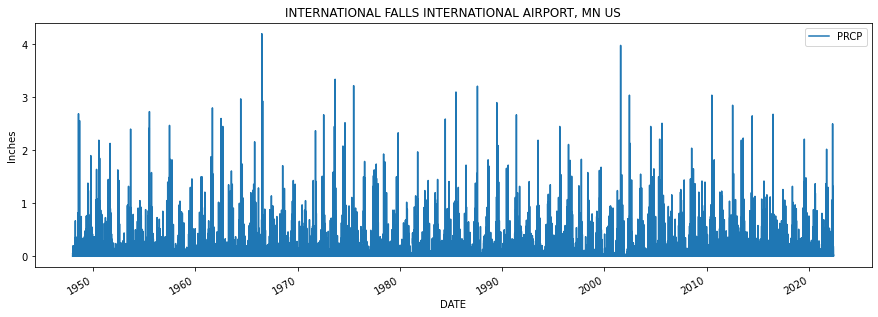

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import pandas as pd

def read_prcp(datafile="../../data/weather-inl.csv", station="USW00014918"):
    df = pd.read_csv(datafile, usecols=["STATION", "NAME", "DATE", "PRCP"])
    
    # select international falls airport station
    df = df[df["STATION"]==station]
    
    # convert to pandas datetime format
    dates = pd.to_datetime(df.loc[:, "DATE"])
    df.loc[:, "DATE"] = dates
    
    # select modern data series since 1948
    df = df[df["DATE"] >= dt.datetime(1948, 1, 1)]
    name = df["NAME"].loc[min(df.index)]
    df = df.loc[:, ["DATE", "PRCP"]]
    df = df.dropna()
    
    df['year'] = df['DATE'].dt.year
    df['month'] = df['DATE'].dt.month
    df['doy'] = df['DATE'].dt.dayofyear

    # determine water_year
    for i in df.index:
        yr = df.loc[i, "DATE"].year
        if df.loc[i, "DATE"].month <= 9:
            df.loc[i, "water_year"] = int(yr)
        else:
            df.loc[i, "water_year"] = int(yr + 1)
    df = df.set_index("DATE")
    df.name = name
    return df

prcp = read_prcp()
prcp.plot(y="PRCP", figsize=(15, 5), ylabel="Inches", title=prcp.name)

1360.0

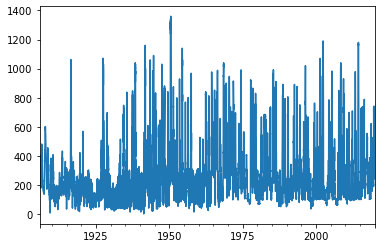

In [6]:

rr = hydat.get_flows("05PC019")
rr.plot()
rr.max()

                 level   flow   prcp
2022-01-01  337.592987  194.0   0.00
2022-01-02  337.589996  320.0   0.18
2022-01-03  337.589996  320.0   0.22
2022-01-04  337.587006  317.0   0.22
2022-01-05  337.587006  314.0   0.22
...                ...    ...    ...
2022-12-27  337.559998  430.0  32.44
2022-12-28  337.550995  428.0  32.44
2022-12-29  337.541992  439.0  32.44
2022-12-30  337.526001  445.0  32.44
2022-12-31  337.510986  357.0  32.44

[365 rows x 3 columns]


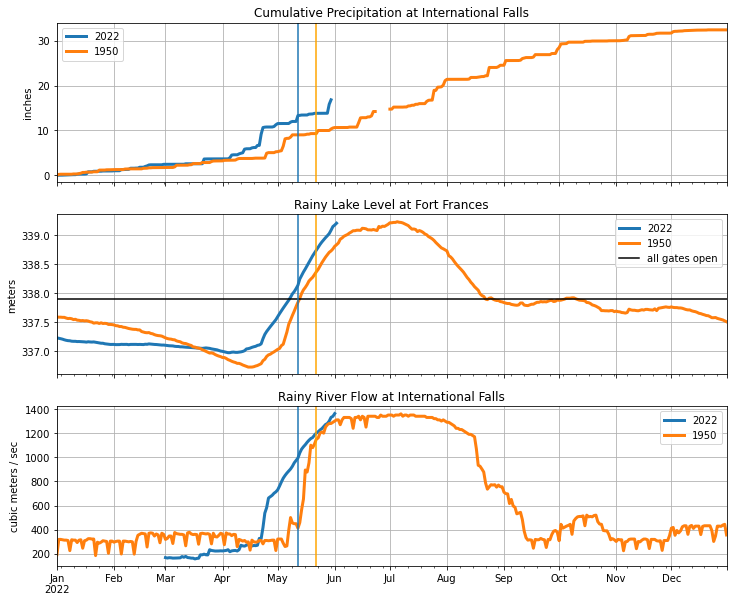

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

def summary_hist(year):
    X = pd.DataFrame()
    X['level'] = hydat.get_levels("05PB007", start=year, end=year)
    X['flow'] = rainy_river_flows = hydat.get_flows("05PC019", start=year, end=year)
    
    cum_prcp = prcp.groupby(["year"])["PRCP"].cumsum().to_frame()
    cum_prcp["year"] = cum_prcp.index.year
    X['prcp'] = cum_prcp[cum_prcp["year"]==year]["PRCP"]

    return X

def summary_2022():
    X = pd.DataFrame()
    
    rl = pd.read_csv("../../data/05PB007_HG_Jun-2-2022_06_58_55PM.csv", skiprows=8)
    rl["DATE"] = pd.to_datetime(rl["Date (EST)"])
    rl["doy"] = rl["DATE"].dt.dayofyear
    level = rl.groupby("doy")["Value (m)"].mean().to_frame()
    
    startdate = dt.datetime(2022, 1, 1)
    dates = [startdate + dt.timedelta(days=day-1) for day in level.index]
    level.index = dates
    X["level"] = level
    
    prcp = read_prcp("../../data/2990672.csv")
    cum_prcp = prcp.groupby(["year"])["PRCP"].cumsum().to_frame()
    cum_prcp["year"] = cum_prcp.index.year
    X['prcp'] = cum_prcp[cum_prcp["year"]==2022]["PRCP"]
    
    flow = pd.read_csv("../../data/rainy_river.txt", skiprows=29, sep='\t')
    flow = flow.iloc[:, [2, 3]]
    flow.columns = ["DATE", "FLOW"]
    flow["DATE"] = pd.to_datetime(flow["DATE"])
    flow = flow[flow["DATE"] >= dt.datetime(2022, 1, 1)]
    flow["FLOW"] = 0.0283168 * pd.to_numeric(flow["FLOW"], errors="coerce")
    flow = flow.set_index("DATE")
    
    X['flow'] = flow
    
    return X

year = 1950
Y = summary_hist(year)
Y.index = Y.index + pd.Timedelta(int((2022-year)*365.25), "d")
print(Y)
X = summary_2022()

fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

X["prcp"].plot(ax=ax[0], lw=3)
Y["prcp"].plot(ax=ax[0], lw=3)
ax[0].grid(True)
ax[0].set_title("Cumulative Precipitation at International Falls")
ax[0].set_ylabel("inches")
ax[0].legend(["2022", f"{year}"])

X["level"].plot(ax=ax[1], lw=3)
Y["level"].plot(ax=ax[1], lw=3)
ax[1].axhline(337.9, color='k')
ax[1].grid(True)
ax[1].set_title("Rainy Lake Level at Fort Frances")
ax[1].set_ylabel("meters")
ax[1].legend(["2022", f"{year}", "all gates open"])


X["flow"].plot(ax=ax[2], lw=3)
Y["flow"].plot(ax=ax[2], lw=3)
ax[2].grid(True)
ax[2].set_title("Rainy River Flow at International Falls")
ax[2].set_ylabel("cubic meters / sec")
ax[2].legend(["2022", f"{year}"])

# data file
data_file = "../../data/ice_out_dates_rainy_lake.txt"

# Read .csv file
ice_out = pd.read_csv(data_file, skiprows=1)
ice_out.columns = ["date", "source", "comments"]

# Create a new independent variable that counts years from the first date in the data set
ice_out['date'] = pd.to_datetime(ice_out['date'])
ice_out['year'] = ice_out['date'].dt.year
ice_out['doy'] = ice_out['date'].dt.dayofyear
ice_out['n'] = ice_out['year'] - ice_out['year'][0]

# Drop unneeded columns
ice_out = ice_out.drop(labels='source', axis=1)
ice_out = ice_out.drop(labels='comments', axis=1)

# drop data prior to 1948
ice_out = ice_out.set_index("year")

io_X = dt.datetime(2022, 1, 1) + dt.timedelta(days = int(ice_out.loc[2022, "doy"] - 1))
io_Y = dt.datetime(2022, 1, 1) + dt.timedelta(days = int(ice_out.loc[year, "doy"] - 1))

ax[0].axvline(io_X)
ax[0].axvline(io_Y, color="orange")

ax[1].axvline(io_X)
ax[1].axvline(io_Y, color="orange")

ax[2].axvline(io_X)
ax[2].axvline(io_Y, color="orange")


NameError: name 'cum_prcp' is not defined

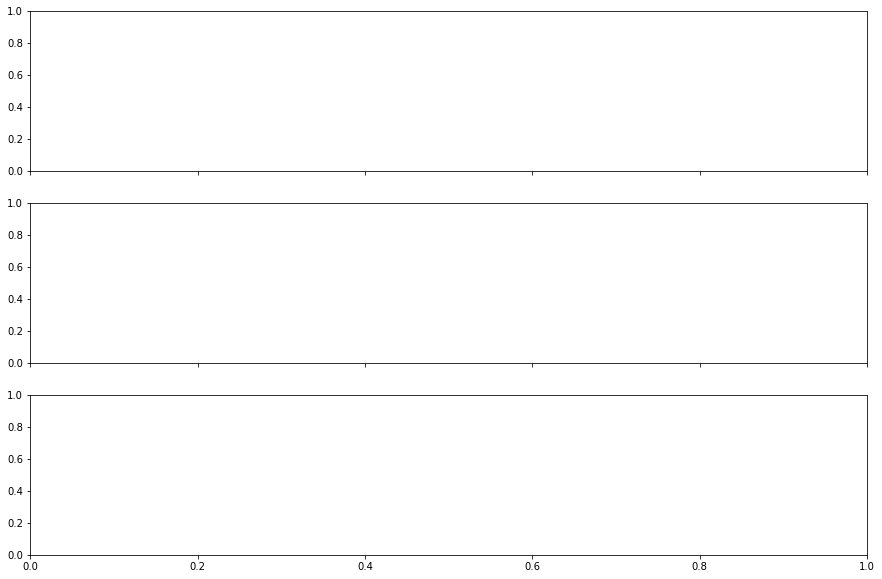

In [10]:
    fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

    cum_prcp.plot(ax=ax[0], grid=True, lw=3, ylabel="inches", title="cumulative precipation")

    rainy_lake_levels.plot(ax=ax[1], grid=True, ylabel="meters", lw=3, title="Rainy Lake level")
    ax[1].axhline(337.9, color='r')
    ax[1].legend([f"{year} level", "all gates open"])

    rainy_river_flows.plot(ax=ax[2], grid=True, lw=3, title="Rainy River flows")
    ax[2].legend([f"{year} flows"])

year_summary(1950)

In [8]:
df = pd.DataFrame()
df['RL'] = rainy_lake_levels
df['RR'] = rainy_river_flows
df.plot(x='RR', y='RL')

NameError: name 'rainy_lake_levels' is not defined

In [9]:
df[df.index.year == 1916].plot(x='RR', y='RL')

AttributeError: 'Index' object has no attribute 'year'

In [ ]:
df[df.index.year == 2014].plot(x='RR', y='RL', color='red')

In [ ]:
df[df.index.year==1950]['RL'].max()

In [ ]:
df[df.index.year==2014]['RL'].plot()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

def rl_plot(year, ax):
    data = df[df.index.year == year]
    x = data['RR']
    y = data['RL']
    plt.plot(x, y, label=str(year))
    #ax = data.plot(x = data.index.dayofyear, y='RL')



rl_plot(1916, ax)
rl_plot(1950, ax)
rl_plot(2014, ax)
ax.axhline(337.9, color='r', label='all gates open')
ax.plot(1170, 338.8, 'r.', ms=20)
ax.legend()
ax.set_xlabel('Rainy River Flow (cubic meters per second)')
ax.set_ylabel('meters')
ax.set_title('Rainy Lake Levels for Three Highest Water Years on Record')
ax.grid(True)
fig.savefig('ago.png')



In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

def dam_plot(year, ax):
    data = df[df.index.year == year]
    x = data.index.dayofyear
    y = data['RL']
    plt.plot(x, y, label=str(year))
    #ax = data.plot(x = data.index.dayofyear, y='RL')


dam_plot(1916, ax)
dam_plot(1950, ax)
dam_plot(2014, ax)
ax.axhline(337.9, color='r', label='all gates open')
ax.legend()
ax.set_xlabel('Day of Year')
ax.set_ylabel('meters')
ax.set_title('Rainy Lake Levels for Three Highest Water Years on Record')
ax.grid(True)
fig.savefig('ago.png')


## Flood years

In [32]:
df = pd.DataFrame(hydat.get_levels("05PB007", start=1948, end="2022"), columns=["level"])

<AxesSubplot:xlabel='year'>

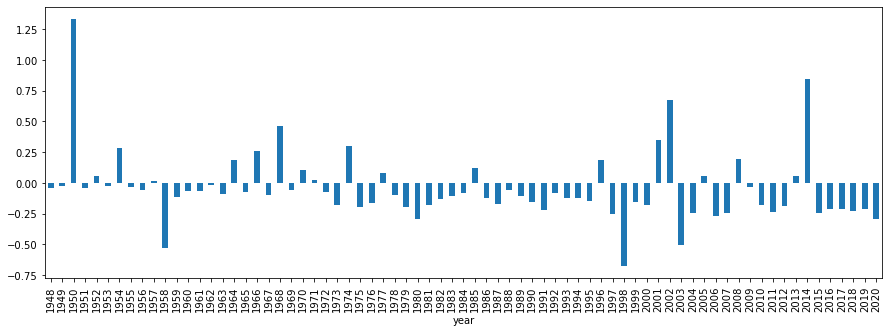

In [53]:
df["year"] = df.index.year
df["flood_level"] = df["level"] - 337.9

max_levels = df.groupby("year")["level"].max().to_frame()
max_levels["flood"] = max_levels >= 337.9
(max_levels["level"] - 337.9).plot(kind="bar", figsize=(15, 5))

In [ ]:
rainy_river_flows = hydat.get_flows("05PC019", start=yr, end=yr)
